# STACK EXCHANGE DATA EXPLARATORY PROJECT


In [77]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
stack_exchange_df = pd.read_csv("QueryResults.csv",parse_dates=["CreationDate"])
stack_exchange_df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,46659,2019-03-04 19:36:00,0,30,<machine-learning><classification><correlation>,2,NaN
1,46660,2019-03-04 19:45:07,0,26,<machine-learning><dataset><data-mining><windows>,1,NaN
2,46667,2019-03-04 22:30:23,0,176,<machine-learning><statistics><generalization>,1,NaN
3,46672,2019-03-04 23:26:14,1,2682,<lstm>,1,1.0
4,46673,2019-03-04 23:28:53,2,171,<machine-learning><feature-engineering><model-...,2,NaN


In [78]:
stack_exchange_df.shape

(6776, 7)

In [79]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
questions

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
...,...,...,...,...,...,...,...
8834,55413,2019-07-10 09:08:31,1,39,<pca><dimensionality-reduction><linear-algebra>,1,1.0
8835,55414,2019-07-10 09:34:55,0,113,<keras><weight-initialization>,0,NaN
8836,55415,2019-07-10 09:45:37,1,212,<python><visualization><seaborn>,1,NaN
8837,55416,2019-07-10 09:59:56,0,22,<time-series>,0,NaN


In [80]:
questions.info

<bound method DataFrame.info of          Id        CreationDate  Score  ViewCount  \
0     44419 2019-01-23 09:21:13      1         21   
1     44420 2019-01-23 09:34:01      0         25   
2     44423 2019-01-23 09:58:41      2       1651   
3     44427 2019-01-23 10:57:09      0         55   
4     44428 2019-01-23 11:02:15      0         19   
...     ...                 ...    ...        ...   
8834  55413 2019-07-10 09:08:31      1         39   
8835  55414 2019-07-10 09:34:55      0        113   
8836  55415 2019-07-10 09:45:37      1        212   
8837  55416 2019-07-10 09:59:56      0         22   
8838  55419 2019-07-10 10:31:23      1        168   

                                                   Tags  AnswerCount  \
0                       <machine-learning><data-mining>            0   
1     <machine-learning><regression><linear-regressi...            0   
2          <python><time-series><forecast><forecasting>            0   
3                 <machine-learning><scikit

Once I got familiar wth the data, I started the data cleaning.

In [81]:
questions.fillna(0,inplace=True)

In [82]:
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

In [83]:
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions["FavoriteCount"].dtype

dtype('int64')

In [84]:
questions["Tags"] =  questions["Tags"].str.replace("^<|>$","").str.split("><")
questions["Tags"].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [85]:
tags_dict = {}
for tags in questions["Tags"]:
    for tag in tags:
        if tag in tags_dict:
            tags_dict[tag] += 1
        else:
            tags_dict[tag] = 1
tags_series = pd.Series(tags_dict)   
tags_sorted = tags_series.sort_values(ascending=False)

In order to analyze the top data questions, I needed to separate the tags and do a count of each individual tag. This informaiton will be used to create a horizontal bar plot to see the count of each tag 

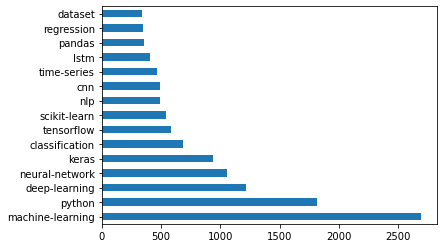

In [86]:
tags_sorted.head(15).plot(kind="barh")

In [87]:
tag_viewcount = {}
for index,row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_viewcount:
            tag_viewcount[tag] += row["ViewCount"]
        else:
            tag_viewcount[tag] = row["ViewCount"]
tag_viewcount_df = pd.Series(tag_viewcount) 
tag_view_count = tag_viewcount_df.sort_values(ascending=False)

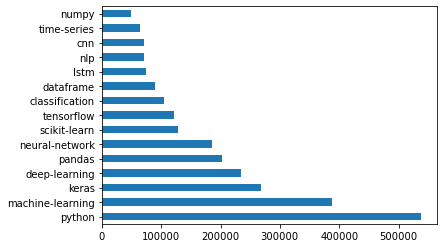

In [88]:
tag_view_count.head(15).plot(kind="barh")

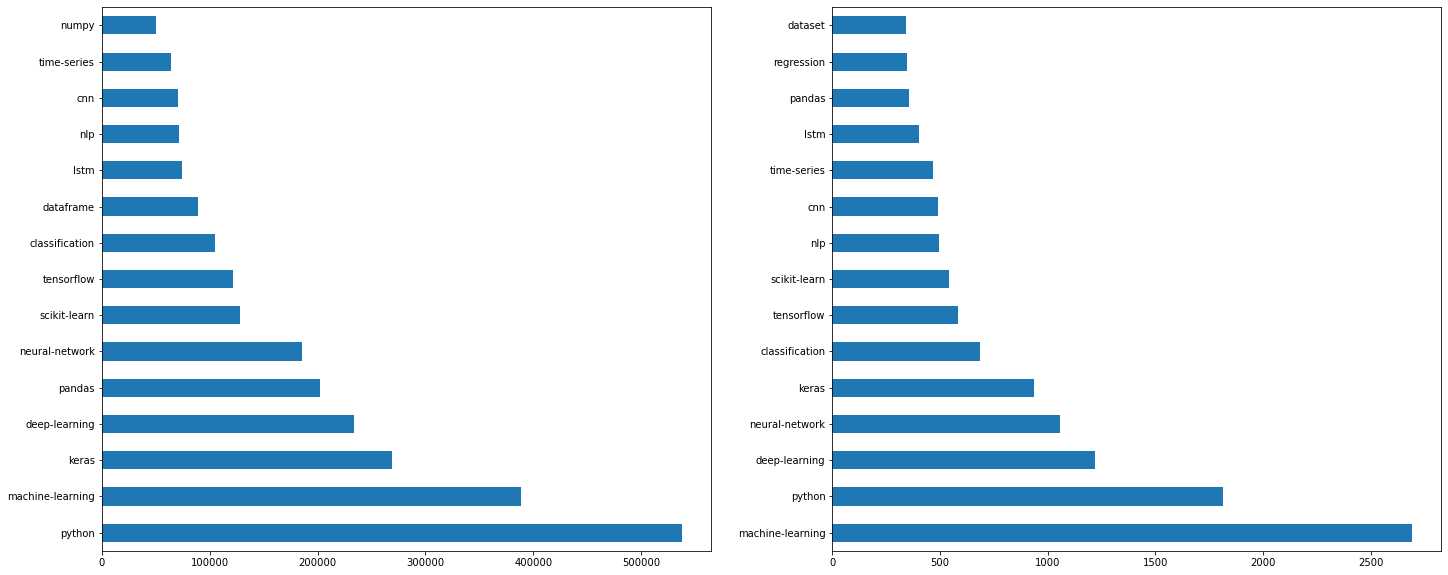

In [89]:
fig, ax = plt.subplots(1,2, figsize=(24,10))
tag_view_count.head(15).plot(kind="barh",ax=ax[0])
tags_sorted.head(15).plot(kind="barh",ax=ax[1])

In [90]:
pd.options.display.max_rows = 600
tags_sorted = pd.DataFrame(tags_sorted)
tags_sorted.rename({0:"Count"},axis=1,inplace=True)
tags_sorted

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [91]:
tag_view_count = pd.DataFrame(tag_view_count)
tag_view_count.rename({0:"ViewCount"},axis=1,inplace=True)
tag_view_count

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


In [92]:
merged_view = pd.merge(left=tag_view_count,right=tags_sorted,how="left",left_index=True,right_index=True)
merged_view

,ViewCount,Count
python,537585,1814
machine-learning,388499,2693
keras,268608,935
deep-learning,233628,1220
pandas,201787,354
neural-network,185367,1055
scikit-learn,128110,540
tensorflow,121369,584
classification,104457,685
dataframe,89352,81


In [93]:
merged_count = pd.merge(left=tag_view_count,right=tags_sorted,how="right",left_index=True,right_index=True)
merged_count

,ViewCount,Count
machine-learning,388499,2693
python,537585,1814
deep-learning,233628,1220
neural-network,185367,1055
keras,268608,935
classification,104457,685
tensorflow,121369,584
scikit-learn,128110,540
nlp,71382,493
cnn,70349,489


In [94]:
tag_index = list(merged_count.index)
merged_df = pd.DataFrame(columns=tag_index,index=tag_index)
merged_df.fillna(0,inplace=True)
merged_df

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,...,marginal-effects,hurdle-model,least-squares-svm,proximal-svm,cs231n,statsmodels,rdkit,apache-nifi,activation,kitti-dataset
machine-learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
python,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deep-learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neural-network,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keras,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
classification,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tensorflow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
scikit-learn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nlp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cnn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
for tags in questions["Tags"]:
    merged_df.loc[tags, tags] += 1
merged_df

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,...,marginal-effects,hurdle-model,least-squares-svm,proximal-svm,cs231n,statsmodels,rdkit,apache-nifi,activation,kitti-dataset
machine-learning,2693,499,429,366,195,259,106,188,113,124,...,0,0,0,0,0,0,0,0,0,0
python,499,1814,160,137,280,98,167,235,71,62,...,0,0,0,0,0,1,0,0,0,0
deep-learning,429,160,1220,305,247,59,136,16,72,160,...,0,0,0,0,1,0,0,0,0,1
neural-network,366,137,305,1055,235,65,108,24,24,118,...,0,0,0,0,0,0,1,0,1,0
keras,195,280,247,235,935,58,256,34,23,116,...,0,0,0,0,0,0,0,0,0,0
classification,259,98,59,65,58,685,20,47,35,20,...,0,0,0,0,0,0,0,0,0,0
tensorflow,106,167,136,108,256,20,584,15,11,57,...,0,0,0,0,0,0,1,0,1,0
scikit-learn,188,235,16,24,34,47,15,540,12,0,...,0,0,0,0,0,0,0,0,0,0
nlp,113,71,72,24,23,35,11,12,493,7,...,0,0,0,0,0,0,0,0,0,0
cnn,124,62,160,118,116,20,57,0,7,489,...,0,0,0,0,0,0,0,0,0,0


In [96]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

In [97]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [98]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [99]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [100]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)


,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
11,17Q1,242,698,0.346705
3,15Q1,18,190,0.094737
0,14Q2,9,157,0.057325
12,17Q2,226,647,0.349304
18,18Q4,531,1294,0.410355


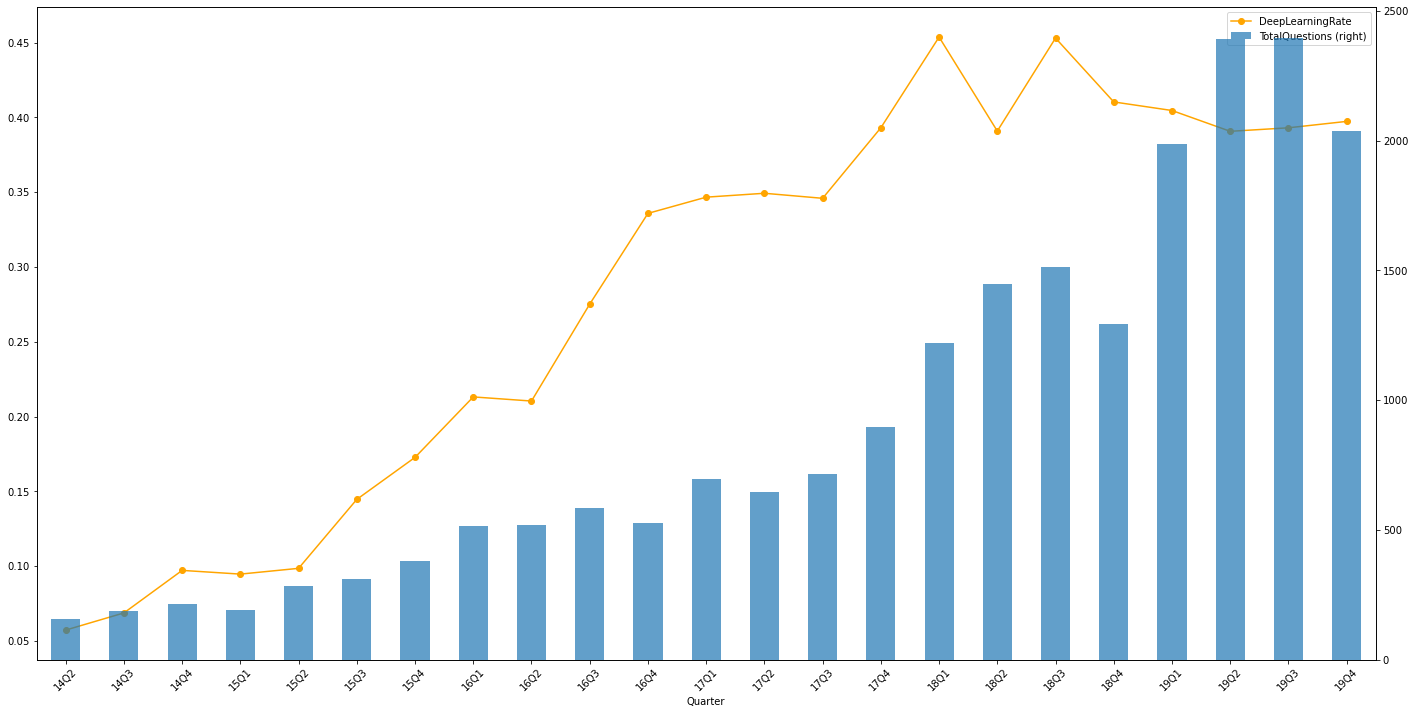

In [101]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)